In [81]:
!pip install prophet

In [82]:
!pip install numpy

In [83]:
#import the needed code modules
#Pandas- basic for JN/JL/COLAB
import pandas as pd
#MatPlotlib- to assist with cultivating plots of data
import matplotlib.pyplot as plt
#NumPy- to access the library for mean() and other mathematical commands
import numpy as np
#Prophet- to predict future data in specific dataframes/data collections
from prophet import Prophet


In [84]:
#Read the CSV files into the program/cells.
##Everything present in this cell is filler as of now, it should be fixed when
##utilizing this cell with the propeer CSV file information.
data_x = pd.read_csv("files/congress-trading-all.csv")

#Produce Dataframes for the CSV files
x_df = pd.DataFrame(data_x)

#Display the DataFrames. . . 
display(x_df.head())


,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,GLW,ST,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,-1.054504,Georgia,2024-07-25
1,ABCB,ST,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",NEW,STIFEL,NaN,Earl Leroy Carter,C001103,2024-07-24,R,GA01,House,NaN,2024-07-25,2.772833,Georgia,2024-07-25
2,UPS,ST,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.592441,Georgia,2024-07-25
3,DUK,ST,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.541266,Georgia,2024-07-25
4,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.599848,Georgia,2024-07-25


In [85]:
x_df_clean = x_df[['Name','Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
display(x_df_clean.head())
display(x_df_clean.tail())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene,R,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter,R,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene,R,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene,R,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene,R,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
47266,Ms. Tammy Duckworth,D,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",19.001886
47267,Ms. Tammy Duckworth,D,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",-143.881120
47268,Mr. Alan S. Lowenthal,D,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",89.238230
47269,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NaN
47270,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-02-27,Sale,"$1,001 - $15,000",NaN


In [86]:
x_df_clean['Traded'] = pd.to_datetime(x_df_clean['Traded'])

/var/folders/24/dm8qthbj15d35lycw6ll_l7h0000gn/T/ipykernel_33783/1089642879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Traded'] = pd.to_datetime(x_df_clean['Traded'])


In [87]:
for column in x_df_clean.columns:
    print(x_df_clean['Name'].value_counts())

Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick 

In [88]:
x_df_clean['Name'].unique()

array(['Marjorie Taylor Mrs Greene', 'Earl Leroy Carter',
       'Robert E. Latta', 'Kathy Castor', 'Rudy Yakym Iii',
       'Boozman, John', 'Rick Larsen', 'Jamie Raskin',
       'Gerald E. Connolly', 'Nancy Pelosi', 'Mark Dr Green',
       'Josh Gottheimer', 'Victoria Spartz', 'Kevin Hern',
       'Morgan Mcgarvey', 'Earl Blumenauer', 'Whitehouse, Sheldon',
       'Capito, Shelley Moore', 'Max Miller', 'Mullin, Markwayne',
       'Lloyd Doggett', 'Debbie Dingell', 'Richard W. Allen',
       'Kathy Manning', 'Thomas H. Kean Jr.', 'Pete Sessions',
       'Abigail Spanberger', 'McConnell, A. Mitchell Jr.',
       'Hickenlooper, John', 'Carper, Thomas R.', 'Stephen F. Lynch',
       'Virginia Foxx', 'Chip Roy', 'William R. Keating',
       'Debbie Wasserman Schultz', 'Peters, Gary', 'Mikie Sherrill',
       'Tuberville, Tommy', 'Susie Lee', 'Carol Devine Miller',
       'C. Scott Franklin', 'Maria Elvira Salazar', 'Jonathan Jackson',
       'Deborah Ross', 'Cruz, Ted', 'Mike Kelly', 'Dan

In [89]:
x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'
x_df_clean2 = x_df_clean[['Name_Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
x_df_clean2.head()

/var/folders/24/dm8qthbj15d35lycw6ll_l7h0000gn/T/ipykernel_33783/1642867295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'


,Name_Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene (R),CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter (R),AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene (R),"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene (R),DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene (R),JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


In [90]:
for column in x_df_clean2.columns:
    print(x_df_clean2['Name_Party'].value_counts())

Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64


Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          133

In [125]:
top_subjects = x_df_clean2['Name_Party'].value_counts().head(6)
top_subjects

Name_Party
Josh Gottheimer (D)     2786
Thomas Macarthur (R)    2758
Perdue, David (R)       2242
Lois Frankel (D)        1358
Greg Gianforte (R)      1331
Susie Lee (D)           1262
Name: count, dtype: int64

In [126]:
df_josh = x_df_clean[x_df_clean['Name_Party'] == 'Josh Gottheimer (D)']
df_thomas = x_df_clean[x_df_clean['Name_Party'] == 'Thomas Macarthur (R)']
df_perdue = x_df_clean[x_df_clean['Name_Party'] == 'Perdue, David (R)']
df_lois = x_df_clean[x_df_clean['Name_Party'] == 'Lois Frankel (D)']
df_greg = x_df_clean[x_df_clean['Name_Party'] == 'Greg Gianforte (R)']
df_susie = x_df_clean[x_df_clean['Name_Party'] == 'Susie Lee (D)']

top6_df = pd.concat([
    df_josh,
    df_thomas,
    df_perdue,
    df_lois,
    df_greg,
    df_susie
], ignore_index=True)
top6_df

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
0,Josh Gottheimer,D,MARRIOTT INTERNATIONAL - CLASS A COMMON STOCK,2024-06-28,Sale,"$1,001 - $15,000",-2.178386,Josh Gottheimer (D)
1,Josh Gottheimer,D,APPLE INC. - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",3.444960,Josh Gottheimer (D)
2,Josh Gottheimer,D,NVIDIA CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-8.523072,Josh Gottheimer (D)
3,Josh Gottheimer,D,MICROSOFT CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-4.890644,Josh Gottheimer (D)
4,Josh Gottheimer,D,"LOWE'S COMPANIES, INC. COMMON STOCK",2024-06-28,Sale,"$1,001 - $15,000",8.310732,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
11732,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
11733,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
11734,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
11735,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


<Figure size 1200x1000 with 0 Axes>

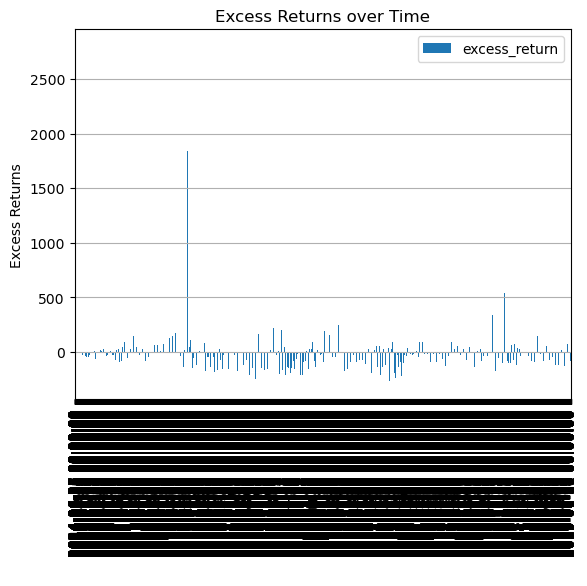

In [130]:
plt.figure(figsize=(12, 10))
top6_df.plot.bar(x = 'Traded', y= 'excess_return')
plt.title('Excess Returns over Time')
plt.xlabel(' ')
plt.ylabel('Excess Returns')
plt.grid(axis='y')
plt.axhline(0, color='black', linestyle='-')
plt.show()

In [134]:
top6_fil = top6_df[(top6_df['Traded'] >= '2019-01-01') & (top6_df['Traded'] <= '2021-12-31')]
top6_fil

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
1265,Josh Gottheimer,D,"META PLATFORMS, INC. - CLASS A",2021-12-29,Sale,"$1,001 - $15,000",-28.761068,Josh Gottheimer (D)
1266,Josh Gottheimer,D,PING AN INSURANCE,2021-12-28,Sale,"$1,001 - $15,000",-53.924235,Josh Gottheimer (D)
1267,Josh Gottheimer,D,"AFFIRM HOLDINGS, INC. - CLASS A",2021-12-28,Sale,"$1,001 - $15,000",-87.476874,Josh Gottheimer (D)
1268,Josh Gottheimer,D,TENCENT HOLDINGS LIMITED UNSPONSORED ADR REPRE...,2021-12-28,Sale,"$1,001 - $15,000",-35.958034,Josh Gottheimer (D)
1269,Josh Gottheimer,D,XP INC. - CLASS A,2021-12-22,Purchase,"$1,001 - $15,000",-56.297544,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
11732,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
11733,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
11734,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
11735,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [135]:
josh_fil = top6_fil[top6_fil['Name_Party'] == 'Josh Gottheimer (D)']
thomas_fil = top6_fil[top6_fil['Name_Party'] == 'Thomas Macarthur (R)']
perdue_fil = top6_fil[top6_fil['Name_Party'] == 'Perdue, David (R)']
lois_fil = top6_fil[top6_fil['Name_Party'] == 'Lois Frankel (D)']
greg_fil = top6_fil[top6_fil['Name_Party'] == 'Greg Gianforte (R)']
susie_fil = top6_fil[top6_fil['Name_Party'] == 'Susie Lee (D)']

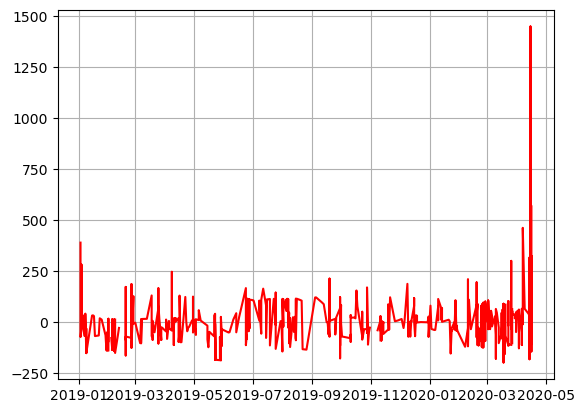

<Figure size 1200x2000 with 0 Axes>

In [136]:
plt.plot(perdue_fil['Traded'], perdue_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

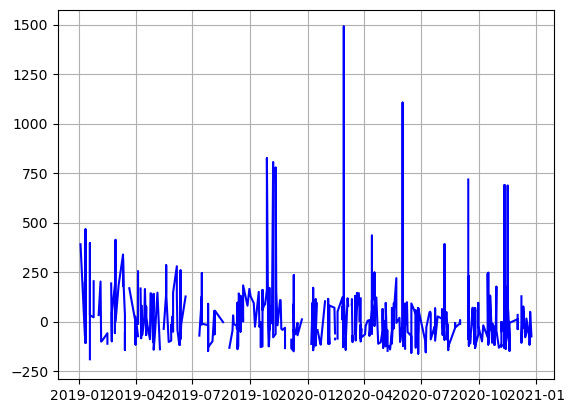

<Figure size 1200x2000 with 0 Axes>

In [99]:
plt.plot(josh_fil['Traded'], josh_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

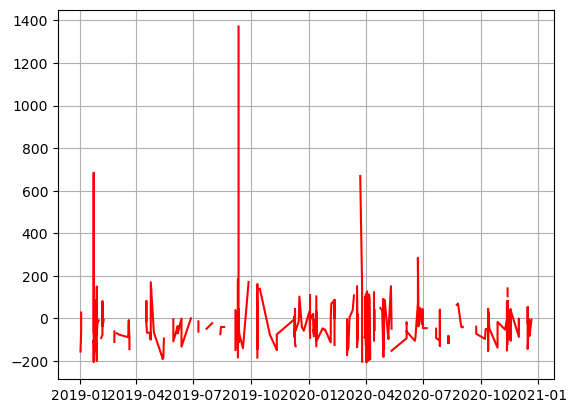

<Figure size 1200x2000 with 0 Axes>

In [100]:
plt.plot(greg_fil['Traded'], greg_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

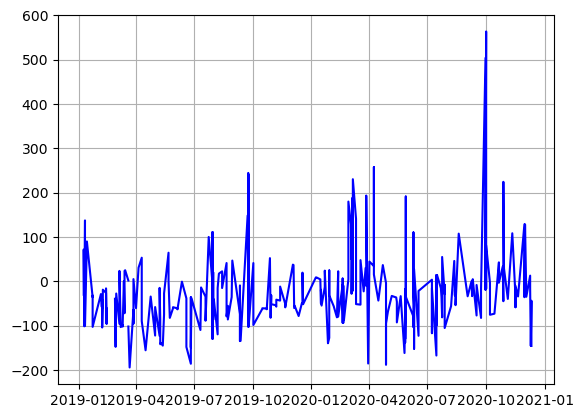

<Figure size 1200x2000 with 0 Axes>

In [101]:
plt.plot(lois_fil['Traded'], lois_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

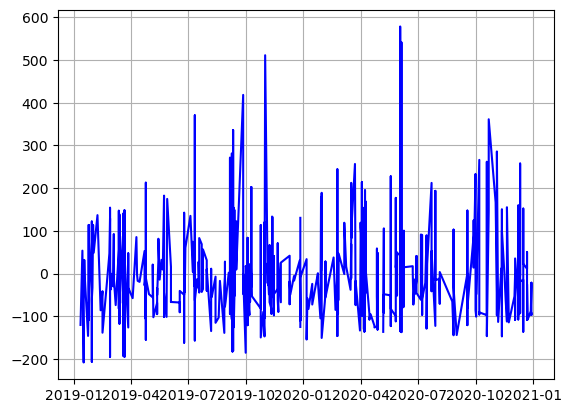

<Figure size 1200x2000 with 0 Axes>

In [102]:
plt.plot(susie_fil['Traded'], susie_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

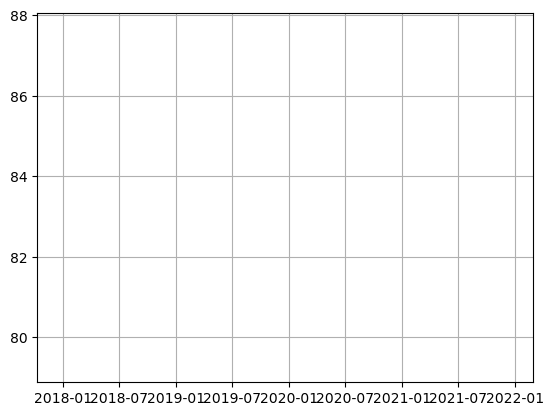

<Figure size 1200x2000 with 0 Axes>

In [103]:
plt.plot(thomas_fil['Traded'], thomas_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

In [104]:
display(perdue_fil)
display(greg_fil)
display(thomas_fil)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
5544,"Perdue, David",R,The Southern Company JR SUB NT 2015A,2020-04-16,Sale (Full),"$15,001 - $50,000",-25.492363,"Perdue, David (R)"
5545,"Perdue, David",R,Philip Morris International Inc.,2020-04-16,Sale (Full),"$1,001 - $15,000",-44.672848,"Perdue, David (R)"
5546,"Perdue, David",R,The Walt Disney Company,2020-04-16,Sale (Full),"$1,001 - $15,000",-106.888235,"Perdue, David (R)"
5547,"Perdue, David",R,"General Mills, Inc.",2020-04-16,Sale (Full),"$1,001 - $15,000",-85.760966,"Perdue, David (R)"
5548,"Perdue, David",R,ConocoPhillips,2020-04-16,Sale (Full),"$1,001 - $15,000",161.769592,"Perdue, David (R)"
...,...,...,...,...,...,...,...,...
6367,"Perdue, David",R,Devon Energy Corporation,2019-01-04,Purchase,"$15,001 - $50,000",-27.139188,"Perdue, David (R)"
6368,"Perdue, David",R,Knowles Corporation,2019-01-03,Sale (Partial),"$1,001 - $15,000",-72.944918,"Perdue, David (R)"
6369,"Perdue, David",R,"BWX Technologies, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",37.345831,"Perdue, David (R)"
6370,"Perdue, David",R,"WPX Energy, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",-71.215186,"Perdue, David (R)"


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
9144,Greg Gianforte,R,CHINA MOBILE LIMITED,2020-12-21,Sale,"$100,001 - $250,000",-5.532058,Greg Gianforte (R)
9145,Greg Gianforte,R,"VIASAT, INC.",2020-12-18,Purchase,"$100,001 - $250,000",-82.091119,Greg Gianforte (R)
9146,Greg Gianforte,R,ISHARES RUSSELL 2000 VALUE ETF,2020-12-18,Sale,"$250,001 - $500,000",-15.493774,Greg Gianforte (R)
9147,Greg Gianforte,R,CARDTRONICS PLC,2020-12-17,Sale,"$1,001 - $15,000",-3.601380,Greg Gianforte (R)
9148,Greg Gianforte,R,CARDTRONICS PLC,2020-12-17,Sale,"$1,001 - $15,000",-3.601380,Greg Gianforte (R)
...,...,...,...,...,...,...,...,...
9910,Greg Gianforte,R,ATLAS COPCO AB SPONSORED ADR REPSTG CLASS A,2019-01-04,Purchase,"$100,001 - $250,000",NaN,Greg Gianforte (R)
9911,Greg Gianforte,R,INFINEON TECHNOLOGIES AG,2019-01-04,Purchase,"$250,001 - $500,000",NaN,Greg Gianforte (R)
9912,Greg Gianforte,R,MULTI-COLOR CORPORATION,2019-01-03,Purchase,"$100,001 - $250,000",27.974910,Greg Gianforte (R)
9913,Greg Gianforte,R,"THERMON GROUP HOLDINGS, INC.",2019-01-03,Purchase,"$50,001 - $100,000",-60.959381,Greg Gianforte (R)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
2786,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.469809,Thomas Macarthur (R)


In [105]:
display(josh_fil)
display(lois_fil)
display(susie_fil)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
1669,Josh Gottheimer,D,"DEXCOM, INC.",2020-12-24,Sale,"$1,001 - $15,000",-75.411731,Josh Gottheimer (D)
1670,Josh Gottheimer,D,BERKSHIRE HATHAWAY INC. NEW,2020-12-22,Purchase,"$1,001 - $15,000",49.022408,Josh Gottheimer (D)
1671,Josh Gottheimer,D,"PHREESIA, INC.",2020-12-21,Sale,"$1,001 - $15,000",-101.034484,Josh Gottheimer (D)
1672,Josh Gottheimer,D,"CASTLE BIOSCIENCES, INC. - COMMON STOCK",2020-12-21,Purchase,"$1,001 - $15,000",-118.026563,Josh Gottheimer (D)
1673,Josh Gottheimer,D,"ICU MEDICAL, INC.",2020-12-21,Sale,"$1,001 - $15,000",-85.516158,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
2439,Josh Gottheimer,D,"ALTRIA GROUP, INC.",2019-01-11,Purchase,"$1,001 - $15,000",-107.191061,Josh Gottheimer (D)
2440,Josh Gottheimer,D,"UNITED PARCEL SERVICE, INC.",2019-01-11,Purchase,"$1,001 - $15,000",-78.739873,Josh Gottheimer (D)
2441,Josh Gottheimer,D,MICROSOFT CORPORATION,2019-01-10,Sale,"$1,001 - $15,000",200.269589,Josh Gottheimer (D)
2442,Josh Gottheimer,D,NEWMARKET CORP,2019-01-10,Sale,"$1,001 - $15,000",-71.844697,Josh Gottheimer (D)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
8284,Lois Frankel,D,"BLUEBIRD BIO, INC.",2020-12-11,Sale,"$1,001 - $15,000",-145.791096,Lois Frankel (D)
8285,Lois Frankel,D,PPL CORPORATION,2020-12-11,Sale,"$1,001 - $15,000",-43.821084,Lois Frankel (D)
8286,Lois Frankel,D,"BLUEBIRD BIO, INC.",2020-12-10,Sale,"$1,001 - $15,000",-145.611509,Lois Frankel (D)
8287,Lois Frankel,D,THERMO FISHER SCIENTIFIC INC,2020-12-09,Purchase,"$1,001 - $15,000",-16.812044,Lois Frankel (D)
8288,Lois Frankel,D,NXP SEMICONDUCTORS N.V.,2020-12-09,Sale,"$1,001 - $15,000",12.808591,Lois Frankel (D)
...,...,...,...,...,...,...,...,...
8585,Lois Frankel,D,HUNTSMAN CORPORATION,2019-01-10,Purchase,"$1,001 - $15,000",-101.490687,Lois Frankel (D)
8586,Lois Frankel,D,"GOLDMAN SACHS GROUP, INC.",2019-01-09,Sale,"$1,001 - $15,000",71.683812,Lois Frankel (D)
8587,Lois Frankel,D,"EXPEDITORS INTERNATIONAL OF WASHINGTON, INC.",2019-01-09,Purchase,"$1,001 - $15,000",-30.264916,Lois Frankel (D)
8588,Lois Frankel,D,ROCHE HOLDINGS AG BASEL AMERICAN DEPOSITARY SH...,2019-01-09,Purchase,"$1,001 - $15,000",NaN,Lois Frankel (D)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
10868,Susie Lee,D,"FIDELITY NATIONAL INFORMATION SERVICES, INC.",2020-12-29,Sale,"$1,001 - $15,000",-92.993131,Susie Lee (D)
10869,Susie Lee,D,SERVICE PROPERTIES TRUST - SHARES OF BENEFICIA...,2020-12-29,Purchase,"$1,001 - $15,000",-96.556724,Susie Lee (D)
10870,Susie Lee,D,HOWARD HUGHES CORPORATION,2020-12-29,Purchase,"$1,001 - $15,000",-21.190567,Susie Lee (D)
10871,Susie Lee,D,"AMERESCO, INC. CLASS A",2020-12-29,Purchase,"$1,001 - $15,000",-85.797479,Susie Lee (D)
10872,Susie Lee,D,BALL CORPORATION,2020-12-29,Sale,"$1,001 - $15,000",-31.843392,Susie Lee (D)
...,...,...,...,...,...,...,...,...
11732,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
11733,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
11734,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
11735,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [106]:
df_thomas

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.469809,Thomas Macarthur (R)
26980,Thomas Macarthur,R,PHILIP MORRIS INTERNATIONAL INC,2018-12-31,Sale,"$1,001 - $15,000",-47.912357,Thomas Macarthur (R)
26990,Thomas Macarthur,R,NXP SEMICONDUCTORS N.V.,2018-12-31,Purchase,"$15,001 - $50,000",128.382528,Thomas Macarthur (R)
26997,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
26999,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
43714,Thomas Macarthur,R,MICROSOFT CORPORATION,2015-01-09,Purchase,"$1,001 - $15,000",633.959218,Thomas Macarthur (R)
43734,Thomas Macarthur,R,SYNGENTA AG,2015-01-06,Purchase,"$1,001 - $15,000",-270.074051,Thomas Macarthur (R)
43736,Thomas Macarthur,R,TEVA PHARMACEUTICAL INDUSTRIES LIMITED AMERICA...,2015-01-06,Purchase,"$1,001 - $15,000",-241.871053,Thomas Macarthur (R)
43739,Thomas Macarthur,R,KLX INC.,2015-01-06,Sale,"$1,001 - $15,000",10.043209,Thomas Macarthur (R)


In [107]:
display(perdue_fil['Company'].count())
display(perdue_fil['Company'].value_counts().head(1))
display(greg_fil['Company'].count())
display(greg_fil['Company'].value_counts().head(1))
display(thomas_fil['Company'].count())
display(thomas_fil['Company'].value_counts().head(1))

828

Company
Caesars Entertainment Corporation    33
Name: count, dtype: int64

771

Company
AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SERVICES INC    15
Name: count, dtype: int64

1

Company
INTERACTIVE BROKERS GROUP, INC.    1
Name: count, dtype: int64

**Most Common Company of Stocks Purchased from 2019-2021-- Republicans**

*Perdue- Caesar's Entertainment Corporation- 33 Total*

*Greg- AMN Healthcare Services Inc.- 15 Total*

*Thomas- Interactive Brokers Group, Inc.- 1 Total*


In [108]:
display(josh_fil['Company'].count())
display(josh_fil['Company'].value_counts().head(1))
display(lois_fil['Company'].count())
display(lois_fil['Company'].value_counts().head(1))
display(susie_fil['Company'].count())
display(susie_fil['Company'].value_counts().head(1))

775

Company
MICROSOFT CORPORATION    112
Name: count, dtype: int64

306

Company
PHILIP MORRIS INTERNATIONAL INC    7
Name: count, dtype: int64

869

Company
BALL CORPORATION    16
Name: count, dtype: int64

**Most Common Company of Stocks Purchased from 2019-2021-- Democrats**

*Josh- Microsoft Corporation- 156 Total*

*Lois- Dupont De Nemours, Inc. - 10 Total*

*Susie- Ball Corporation - 21 Total*

**Average Excess Return from Priorly Determined Companies from 2019-2021--Republicans**

In [109]:
perdue__comp = perdue_fil[perdue_fil['Company'] == 'Caesars Entertainment Corporation']
cec_avg =perdue__comp['excess_return'].mean()
print(f"The average excess return for Perdue from Caesars Entertainment Corp is {cec_avg} from 2019-2021.")


The average excess return for Perdue from Caesars Entertainment Corp is 109.63409926495764 from 2019-2021.


In [110]:
greg__comp = greg_fil[greg_fil['Company'] == 'AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SERVICES INC']
amn_avg =greg__comp['excess_return'].mean()
amn_avg
print(f"The average excess return for Greg from AMN Healthcare Services is {amn_avg} from 2019-2021.")

The average excess return for Greg from AMN Healthcare Services is -48.21769729854893 from 2019-2021.


In [111]:
thomas__comp = thomas_fil[thomas_fil['Company'] == 'INTERACTIVE BROKERS GROUP, INC.']
ibg_avg =thomas__comp['excess_return'].mean()
ibg_avg
print(f"The average excess return for Thomas from Interactive Brokers Group is {ibg_avg} from 2019-2021.")

The average excess return for Thomas from Interactive Brokers Group is 83.4698092311784 from 2019-2021.


In [112]:
repub_covid = {"Republican": ['Perdue', 'Greg', 'Thomas'],
               "Average Excess Return Covid": [cec_avg, amn_avg, ibg_avg]}

repub_covid_df = pd.DataFrame(repub_covid)
repub_covid_df

,Republican,Average Excess Return Covid
0,Perdue,109.634099
1,Greg,-48.217697
2,Thomas,83.469809


Text(0.5, 1.0, 'Covid Years Average Excess Return--Most Traded Companies')

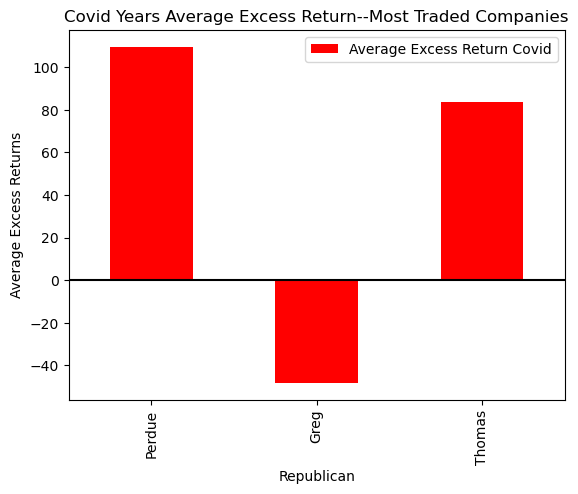

In [113]:
repub_covid_df.plot.bar(x='Republican', y="Average Excess Return Covid", color="r")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Covid Years Average Excess Return--Most Traded Companies')

**Average Excess Return for Prior Mentioned Companies from 2019-2021--Democrats**

In [114]:
josh__comp = josh_fil[josh_fil['Company'] == 'MICROSOFT CORPORATION']
mc_avg =josh__comp['excess_return'].mean()
mc_avg
print(f"The average excess return for Josh from Microsoft Corporation is {mc_avg} from 2019-2021.")

The average excess return for Josh from Microsoft Corporation is 106.58852449322606 from 2019-2021.


In [115]:
lois__comp = lois_fil[lois_fil['Company'] == 'DUPONT DE NEMOURS, INC.']
ddn_avg =lois__comp['excess_return'].mean()
ddn_avg
print(f"The average excess return for Lois from Dupont De Nemours, Inc. is {ddn_avg} from 2019-2021.")

The average excess return for Lois from Dupont De Nemours, Inc. is -40.3930603772265 from 2019-2021.


In [116]:
susie__comp = susie_fil[susie_fil['Company'] == 'BALL CORPORATION']
bc_avg =susie__comp['excess_return'].mean()
bc_avg
print(f"The average excess return for Susie from Ball Corporation is {bc_avg} from 2019-2021.")

The average excess return for Susie from Ball Corporation is -26.884124235680087 from 2019-2021.


In [117]:
democrat_covid = {"Democrat": ['Josh', 'Lois', 'Susie'],
               "Average Excess Return Covid": [mc_avg, ddn_avg, bc_avg]}

democrat_covid_df = pd.DataFrame(democrat_covid)
democrat_covid_df

,Democrat,Average Excess Return Covid
0,Josh,106.588524
1,Lois,-40.393060
2,Susie,-26.884124


Text(0.5, 1.0, 'Covid Years Average Excess Return--Most Traded Companies')

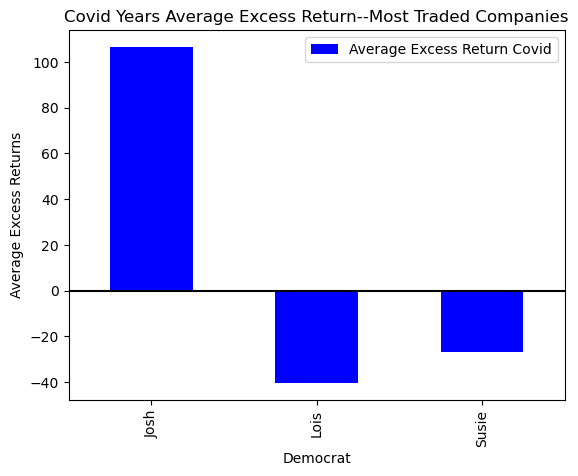

In [118]:
democrat_covid_df.plot.bar(x='Democrat', y="Average Excess Return Covid", color="b")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Covid Years Average Excess Return--Most Traded Companies')

#### Average Excess Returns in 2019-2021 (all companies accounted for)

In [142]:
perdue_exc_avg = perdue_fil['excess_return'].mean()
greg_exc_avg = greg_fil['excess_return'].mean()
thomas_exc_avg = thomas_fil['excess_return'].mean()

rep_exc_avg = {'Republican': ['Perdue', 'Greg', 'Thomas'],
               'Excess Return Average': [perdue_exc_avg, greg_exc_avg, thomas_exc_avg]}

rep_excavg_df = pd.DataFrame(rep_exc_avg)
rep_excavg_df

,Republican,Excess Return Average
0,Perdue,-6.713527
1,Greg,-27.052938
2,Thomas,83.469809


Text(0.5, 1.0, 'Republican Average Excess Returns--Covid Years')

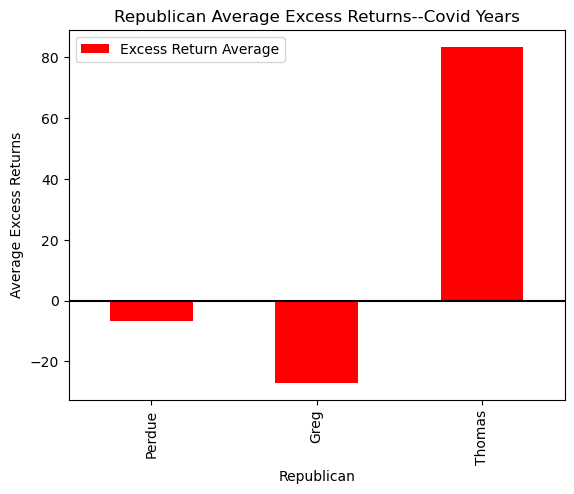

In [143]:
rep_excavg_df.plot.bar(x='Republican', y="Excess Return Average", color="r")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Republican Average Excess Returns--Covid Years')

In [139]:
josh_exc_avg = josh_fil['excess_return'].mean()
lois_exc_avg = lois_fil['excess_return'].mean()
susie_exc_avg = susie_fil['excess_return'].mean()

dem_exc_avg = {'Democrat': ['Josh', 'Lois', 'Susie'],
               'Excess Return Average': [josh_exc_avg, lois_exc_avg, susie_exc_avg]}

dem_excavg_df = pd.DataFrame(dem_exc_avg)
dem_excavg_df

,Democrat,Excess Return Average
0,Josh,5.753123
1,Lois,-19.434593
2,Susie,-17.220559


Text(0.5, 1.0, 'Democrat Average Excess Returns--Covid Years')

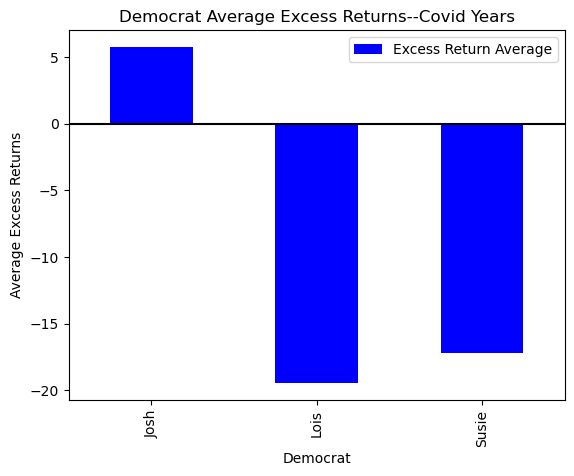

In [140]:
dem_excavg_df.plot.bar(x='Democrat', y="Excess Return Average", color="b")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Democrat Average Excess Returns--Covid Years')